In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

In [5]:
"""
nltk spanish
"""
stemmer = SnowballStemmer('spanish')
stop_words_es = set(stopwords.words("spanish"))
tokenizer = RegexpTokenizer(r'\w+')
stop_words_es.update(['mas','asi','tambien','traves','partir','2', 'xv', 'xx', 'xix', 'i', 'cada', 'da'])

In [35]:
def read_data(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_excel(path, 0)
    filtered_df = df.replace(np.nan, '-', regex=True)
    data = (filtered_df['Resumen'].tolist())
    text = ''.join(data)
    return text

In [38]:
def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    data = (filtered_df['Descripción'].tolist())
    print(data)
    text = ''.join(data)
    return text

In [8]:
def filter_text(text):
    """
    Tokenize text and remove stop words
    :param text:
    :return: list of filtered words
    """
    tokenized_word = tokenizer.tokenize(text)
    filtered_words = [w for w in tokenized_word if
                      w.lower() not in stop_words_es]
    return filtered_words

In [9]:
def dist(filtered_words, num_words):
    """
    Number of the most common words to show
    :param filtered_words:
    :param num_words:
    :return: List[Tuple[_T, int]]
    """
    fdist = FreqDist(filtered_words)
    return fdist.most_common(num_words)

In [10]:
def plot_wordcloud(text):
    """
    Draw wordcloud with matplotlib
    :param text:
    :return:
    """
    wordcloud = WordCloud(max_font_size=50, max_words=100,
                          background_color="white",
                          relative_scaling=1.0,
                          stopwords=stop_words_es).generate(
        text)
    plt.imshow(wordcloud)
    plt.imshow(wordcloud, interpolation="bilinear")
    # bilinear is to make the displayed image appear more smoothly
    plt.axis("off")
    plt.show()

In [11]:
texto = read_data("data/HUMANIDADES DIGITALES_APROBADO_REVISADO_MT.xlsx") 
lista_palabras = filter_text(texto)
dist(lista_palabras, 25)

[('PROYECTO', 532),
 ('INVESTIGACION', 422),
 ('INFORMACION', 321),
 ('DATOS', 308),
 ('ANALISIS', 273),
 ('ESTUDIO', 249),
 ('DESARROLLO', 169),
 ('RESULTADOS', 168),
 ('OBJETIVO', 166),
 ('CORPUS', 165),
 ('DIGITALES', 163),
 ('CONOCIMIENTO', 150),
 ('TEXTOS', 145),
 ('BASE', 143),
 ('DIGITAL', 142),
 ('TRABAJO', 139),
 ('HISTORIA', 122),
 ('WEB', 118),
 ('PATRIMONIO', 117),
 ('ESTUDIOS', 115),
 ('DIFERENTES', 115),
 ('PARTE', 114),
 ('HUMANIDADES', 113),
 ('OBJETIVOS', 113),
 ('USO', 112)]

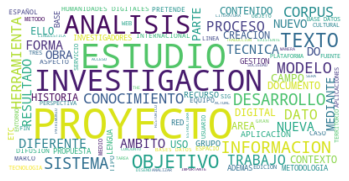

In [12]:
plot_wordcloud(texto)

In [41]:
texto2 = read_csv("data/mapeo_proyectos_2019-09-25T10-57-47.csv") 
lista_palabras2 = filter_text(texto2)
dist(lista_palabras2, 30)

['-', 'El planteamiento del proyecto de investigación "Aplicaciones del proceso digital de imagen al estudio y conservación del arte repestre prehistórico" (DGICYT PB-95-0227) es el resultado de la convergencia de dos líneas de investigación que en la actualidad se desarrollan en el Departamento de Prehistoria del Centro de Estudios Históricos (C.S.I.C.) (Vicent, 1993). La primera de ellas es la aplicación de las técnicas de procesamiento digital de la imagen a la conservación y potenciación del conjunto de colecciones fotográficas sobre arte prehistórico que constituyen el Archivo de Arte Rupestre (AAR) del Departamento. Los trabajos en este sentido se iniciaron en 1991 concentrándose en la más valiosa de estas colecciones desde el punto de vista documental: el Corpus de Pintura Ruprestre Levantina (CPRL). La segunda línea de investigación es el desarrollo de las aplicaciones arqueológicas de la Teledetección Espacial, particularmente en el campo de la Arqueología del Paisaje. Como se

[('proyecto', 137),
 ('datos', 105),
 ('investigación', 102),
 ('bibliotecas', 63),
 ('ediciones', 60),
 ('digital', 58),
 ('siglos', 49),
 ('base', 49),
 ('Biblioteca', 48),
 ('estudio', 47),
 ('análisis', 47),
 ('información', 46),
 ('obras', 44),
 ('digitales', 42),
 ('Ovidio', 40),
 ('textos', 38),
 ('estudios', 35),
 ('obra', 34),
 ('web', 33),
 ('creación', 32),
 ('proyectos', 31),
 ('Historia', 31),
 ('ilustradas', 30),
 ('conocimiento', 29),
 ('equipo', 29),
 ('español', 28),
 ('resultados', 27),
 ('objetivo', 27),
 ('nuevas', 26),
 ('contenidos', 25)]